In [1]:
from pysarflow import Sentinel1GRDProcessor
import matplotlib.pyplot as plt

In [2]:
# Defining area of interest in geojson format
aoi_polygon = {"type":"Polygon",
               "coordinates":[[
                   [-118.185081,34.137719],
                   [-118.185081,34.266631],
                   [-117.983208,34.266631],
                   [-117.983208,34.137719],
                   [-118.185081,34.137719]]]}

# Creating processor instance from Sentinel1GRDProcessor class
processor = Sentinel1GRDProcessor()

# Running search data function using processor instance
processor.search_data(aoi=aoi_polygon, datetime = "2025-01-05/2025-01-10")

c:\Users\Ethel Ogallo\Documents\CDE\PLUS\SS25\practice_softwaredev\pysarflow\.venv\Lib\site-packages\pystac_client\item_search.py:881: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


In [ ]:
import os
os.chdir("/Users/rabinatwayana/Rabina/CDE II/software_development/py_sar_flow/")
!pwd

In [3]:
processor = Sentinel1GRDProcessor()
# Reading Sentinel-1 GRD data
# 2014 SAR data
# zip_safe_path = r"C:\Users\Ethel Ogallo\Documents\CDE\PLUS\SS25\practice_softwaredev\pysarflow\docs\ethel_temp\S1A_IW_GRDH_1SSV_20141004T005844_20141004T005913_002673_002FAB_E4BC_COG.zip"
# safe_extract_path= r"C:\Temp\SAR_old"

# 2025 SAR data
zip_safe_path = r'C:\Users\Ethel Ogallo\Documents\CDE\PLUS\SS25\practice_softwaredev\pysarflow\docs\ethel_temp\S1C_IW_GRDH_1SDV_20250527T181900_20250527T181925_002520_0053F6_70DB_COG.zip'
safe_extract_path= r"C:\Temp\SAR"

# if reading zip file
# zip_safe_path = "docs/data/S1A_IW_GRDH_1SDV_20241209T015852_20241209T015917_056909_06FD49_AE78.SAFE.zip"
# safe_extract_path= "docs/data/"
ds = processor.read_grd_data(zip_safe_path,safe_extract_path)

# #if reading safe file directly
# safe_folder = "docs/data/S1A_IW_GRDH_1SDV_20241209T015852_20241209T015917_056909_06FD49_AE78.SAFE"
# ds = processor.read_grd_data(zip_safe_path)

print(ds)

Extracting zip file: C:\Users\Ethel Ogallo\Documents\CDE\PLUS\SS25\practice_softwaredev\pysarflow\docs\ethel_temp\S1C_IW_GRDH_1SDV_20250527T181900_20250527T181925_002520_0053F6_70DB_COG.zip
Loading band VH from C:\Temp\SAR\S1C_IW_GRDH_1SDV_20250527T181900_20250527T181925_002520_0053F6_70DB_COG.SAFE\measurement\s1c-iw-grd-vh-20250527t181900-20250527t181925-002520-0053f6-002-cog.tiff
Loading band VV from C:\Temp\SAR\S1C_IW_GRDH_1SDV_20250527T181900_20250527T181925_002520_0053F6_70DB_COG.SAFE\measurement\s1c-iw-grd-vv-20250527t181900-20250527t181925-002520-0053f6-001-cog.tiff
Data loaded successfully
<xarray.Dataset> Size: 2GB
Dimensions:      (y: 16680, x: 26182, time: 1)
Coordinates:
    spatial_ref  int32 4B 0
  * time         (time) datetime64[ns] 8B 2025-05-27T18:19:00.755442
Dimensions without coordinates: y, x
Data variables:
    VH           (y, x) uint16 873MB ...
    VV           (y, x) uint16 873MB ...
Attributes:
    startTime:  2025-05-27T18:19:00.755442


In [4]:
# test apply precise orbit files
safe_folder = r"C:\Temp\SAR\S1C_IW_GRDH_1SDV_20250527T181900_20250527T181925_002520_0053F6_70DB_COG.SAFE"
orbit_extract_folder = r"C:\Temp\SAR\S1C_IW_GRDH_1SDV_20250527T181900_20250527T181925_002520_0053F6_70DB_COG.SAFE"

# safe_folder = "docs/data/S1A_IW_GRDH_1SDV_20241209T015852_20241209T015917_056909_06FD49_AE78.SAFE"
# orbit_extract_folder = "docs/data/S1A_IW_GRDH_1SDV_20241209T015852_20241209T015917_056909_06FD49_AE78.SAFE"

ds_with_orbit = processor.apply_orbit_file(ds, safe_folder, orbit_extract_folder, overwrite=False)

print(ds_with_orbit)

Updated orbitList in C:\Temp\SAR\S1C_IW_GRDH_1SDV_20250527T181900_20250527T181925_002520_0053F6_70DB_COG.SAFE\annotation\s1c-iw-grd-vh-20250527t181900-20250527t181925-002520-0053f6-002-cog_updated.xml
Updated orbitList in C:\Temp\SAR\S1C_IW_GRDH_1SDV_20250527T181900_20250527T181925_002520_0053F6_70DB_COG.SAFE\annotation\s1c-iw-grd-vv-20250527t181900-20250527t181925-002520-0053f6-001-cog_updated.xml
<xarray.Dataset> Size: 2GB
Dimensions:      (y: 16680, x: 26182, time: 1)
Coordinates:
    spatial_ref  int32 4B 0
  * time         (time) datetime64[ns] 8B 2025-05-27T18:19:00.755442
    sat_pos_x    (time) float64 8B 5.26e+06
    sat_pos_y    (time) float64 8B -1.098e+06
    sat_pos_z    (time) float64 8B 4.595e+06
    sat_vel_x    (time) float64 8B -5.068e+03
    sat_vel_y    (time) float64 8B -779.0
    sat_vel_z    (time) float64 8B 5.6e+03
Dimensions without coordinates: y, x
Data variables:
    VH           (y, x) uint16 873MB ...
    VV           (y, x) uint16 873MB ...
Attributes:
 

In [5]:
# Calling function for parsing thermal noise removal Lookup Table (LUT)
# thermal_lut_ds=processor.parse_thermal_noise_removal_lut(safe_folder)

# Calling function to remove thermal noise from the datasets
thermal_noise_corrected_ds = processor.remove_thermal_noise(safe_folder, ds_with_orbit)

Reading xml for VH band
Reading xml for VV band
Thermal noise removal LUT created successfully
Thermal noise removed successfully


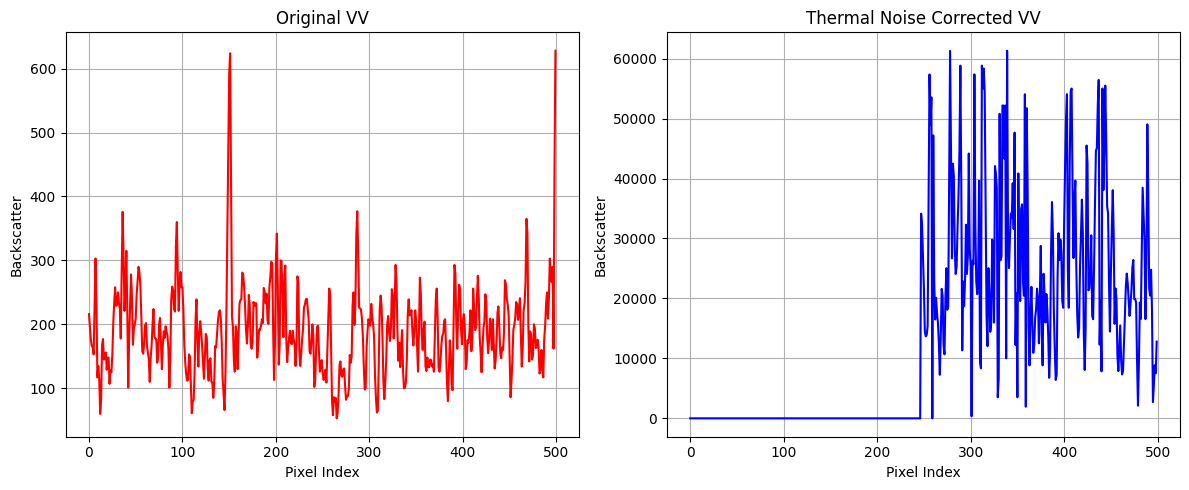

In [6]:
# Only extracting line 5000 and plotting 500 values 
original_vv = ds_with_orbit['VV'].isel(x=5000).values.flatten()[:500]
corrected_vv = thermal_noise_corrected_ds['VV'].isel(line=5000).values.flatten()[:500]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot original
axs[0].plot(original_vv, color='red')
axs[0].set_title("Original VV")
axs[0].set_xlabel("Pixel Index")
axs[0].set_ylabel("Backscatter")
axs[0].grid(True)

# Plot corrected
axs[1].plot(corrected_vv, color='blue')
axs[1].set_title("Thermal Noise Corrected VV")
axs[1].set_xlabel("Pixel Index")
axs[1].set_ylabel("Backscatter")
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [7]:
import os
import re
import xml.etree.ElementTree as ET
from pathlib import Path
import numpy as np
import xarray as xr

In [8]:
#utils functions
def get_ipf_version(safe_folder):
    """
    Extract the Sentinel-1 IPF processor version from manifest.safe.

    Parameters:
        safe_folder(str or Path): Path to Sentinel-1 SAFE folder.

    Returns:
        IPF processor version, e.g., 2.91.
    """
    manifest = Path(safe_folder) / "manifest.safe"
    with open(manifest, 'r', encoding='utf-8') as f:
        text = f.read()

    match = re.search(r'name="Sentinel-1 IPF"\s+version="([\d.]+)"', text)
    if match:
        version = float(match.group(1))
        return version
    raise RuntimeError("IPF version not found in manifest.safe")

def get_acquisition_mode(safe_folder):
    """
    Extract the acquisition mode (e.g., IW or EW) from manifest.safe.

    Parameters
    safe_folder(str or Path) : Path to Sentinel-1 SAFE folder.

    Returns
        Acquisition mode (str).
    """
    manifest_path = Path(safe_folder) / "manifest.safe"
    tree = ET.parse(manifest_path)
    root = tree.getroot()

    namespaces = {prefix: uri for event, (prefix, uri) in ET.iterparse(manifest_path, events=['start-ns'])}
    ns_uri = namespaces.get('s1sarl1')
    if ns_uri is None:
        raise RuntimeError("Namespace prefix 's1sarl1' not found in manifest.safe")

    instr_mode_tag = f'{{{ns_uri}}}instrumentMode'
    mode_tag = f'{{{ns_uri}}}mode'

    instr_mode_elem = root.find(f'.//{instr_mode_tag}')
    if instr_mode_elem is not None:
        mode_elem = instr_mode_elem.find(mode_tag)
        if mode_elem is not None:
            return mode_elem.text.strip()
    raise RuntimeError("Acquisition mode not found in manifest.safe")

def get_calibration_constant(safe_folder):
    """
    Extract the calibration constant (ADN) from calibration XML.

    Parameters
    safe_folder(str or Path) : Path to Sentinel-1 SAFE folder.

    Returns
        Calibration constant (float).
    """
    calib_files = list(Path(safe_folder).glob('annotation/calibration/*calibration-s1*-grd-*.xml'))
    if not calib_files:
        raise RuntimeError("Calibration XML files not found in SAFE folder")
    tree = ET.parse(calib_files[0])
    root = tree.getroot()
    dn_elem = root.find('.//calibrationVector/dn')
    if dn_elem is None or not dn_elem.text:
        raise RuntimeError("Calibration constant (dn) not found in calibration XML")
    adn = float(dn_elem.text.strip().split()[0])
    return adn

def compute_scaling_factor(safe_folder):
    """
    Compute noise scaling factor based on IPF version and acquisition mode.

    Parameters
    safe_folder (str or Path) : Path to Sentinel-1 SAFE folder.

    Returns
        scaling_factor (tuple): float, ipf_version: float 
    """
    ipf_version = get_ipf_version(safe_folder)
    acq_mode = get_acquisition_mode(safe_folder)
    adn = get_calibration_constant(safe_folder)

    knoise = {'IW': 75088.7, 'EW': 56065.87}
    if acq_mode not in knoise:
        raise RuntimeError(f"Unsupported acquisition mode: {acq_mode}")

    if ipf_version < 2.34:
        scaling_factor = knoise[acq_mode] * adn
    else:
        scaling_factor = knoise[acq_mode] * adn * adn

    return scaling_factor, ipf_version

def parse_noise_vectors(safe_folder):
    """
    Parse noise vectors from noise annotation XML files.

    Parameters
    safe_folder(str or Path):Path to Sentinel-1 SAFE folder.

    Returns
    list of tuples: (line_number, pixel_positions, noise_values)
    """
    noise_files = list(Path(safe_folder).glob('annotation/calibration/*noise*.xml'))
    if not noise_files:
        raise RuntimeError("No noise annotation XML files found in SAFE folder")

    noise_vectors = []
    for nf in noise_files:
        tree = ET.parse(nf)
        root = tree.getroot()
        for nv in root.findall('.//noiseVector'):
            line = int(nv.find('line').text)
            pixels = [int(x) for x in nv.find('pixel').text.strip().split()]
            noise_vals = [float(x) for x in nv.find('noiseLut').text.strip().split()]
            noise_vectors.append((line, pixels, noise_vals))
    return noise_vectors

def build_noise_map(noise_vectors, shape, blocksize):
    """
    Build a noise map array for image borders by interpolating noise vectors.

    Parameters
        noise_vectors (list):Output from parse_noise_vectors.
        shape (tuple): (lines, samples) shape of the dataset.
        blocksize (int): Size of border in pixels.

    Returns
        Noise map of same shape as image.(np.ndarray)
    """
    lines, samples = shape
    noise_map = np.zeros((lines, samples), dtype=float)

    vector_lines = np.array([nv[0] for nv in noise_vectors])

    for line, pixels, noises in noise_vectors:
        if line < blocksize or line >= lines - blocksize:
            interp = np.interp(np.arange(samples), pixels, noises)
            noise_map[line, :] = interp
    return noise_map

#grd.py

def remove_border_noise(safe_folder, ds, blocksize=2000, threshold=0.5):
    """
    Remove Sentinel-1 GRD border noise from an xarray.Dataset.

    Parameters
        safe_folder (str or Path): Path to Sentinel-1 SAFE folder.
        ds(xarray.Dataset): GRD dataset with dimensions (line, pixel) or (y, x).
        blocksize (int, optional): Border size in pixels (default: 2000).
        threshold (float, optional): Threshold to keep pixels after noise subtraction (default: 0.5).

    Returns
        xarray.Dataset: Noise-corrected dataset.
    """
    scaling_factor, ipf_version = compute_scaling_factor(safe_folder)

    if ipf_version >= 2.9:
        print(f"[INFO] IPF version {ipf_version} ≥ 2.9 → border noise removal is usually not necessary.")
        return ds
    else:
        print(f"[INFO] IPF version {ipf_version} < 2.9 → removing border noise...")

    noise_vectors = parse_noise_vectors(safe_folder)

    # Determine shape
    lines = ds.dims.get('line', ds.dims.get('y'))
    samples = ds.dims.get('pixel', ds.dims.get('x'))
    shape = (lines, samples)

    # Build noise map
    noise_map = build_noise_map(noise_vectors, shape, blocksize)

    corrected = {}
    for band in ds.data_vars:
        arr = ds[band].values.astype(float)
        mask = np.ones_like(arr, dtype=bool)

        # Top and bottom borders
        for slc in [slice(0, blocksize), slice(lines - blocksize, lines)]:
            arr_part = arr[slc, :]
            noise_part = noise_map[slc, :]
            denoised = arr_part**2 - noise_part * scaling_factor
            mask[slc, :] &= denoised > threshold

        # Left and right borders
        for slc in [slice(0, blocksize), slice(samples - blocksize, samples)]:
            arr_part = arr[:, slc]
            noise_part = noise_map[:, slc]
            denoised = arr_part**2 - noise_part * scaling_factor
            mask[:, slc] &= denoised > threshold

        arr_masked = np.where(mask, arr, 0)
        corrected[band] = (ds[band].dims, arr_masked)

    return xr.Dataset(corrected, coords=ds.coords)


In [9]:
import xarray as xr

bordernoise_removed_ds = remove_border_noise(safe_folder, thermal_noise_corrected_ds)
print(bordernoise_removed_ds)


[INFO] IPF version 3.91 ≥ 2.9 → border noise removal is usually not necessary.
<xarray.Dataset> Size: 7GB
Dimensions:      (line: 16680, pixel: 26182)
Coordinates:
    spatial_ref  int32 4B 0
  * line         (line) int32 67kB 0 1 2 3 4 5 ... 16675 16676 16677 16678 16679
  * pixel        (pixel) int32 105kB 0 1 2 3 4 ... 26177 26178 26179 26180 26181
Data variables:
    VH           (line, pixel) float64 3GB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    VV           (line, pixel) float64 3GB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0


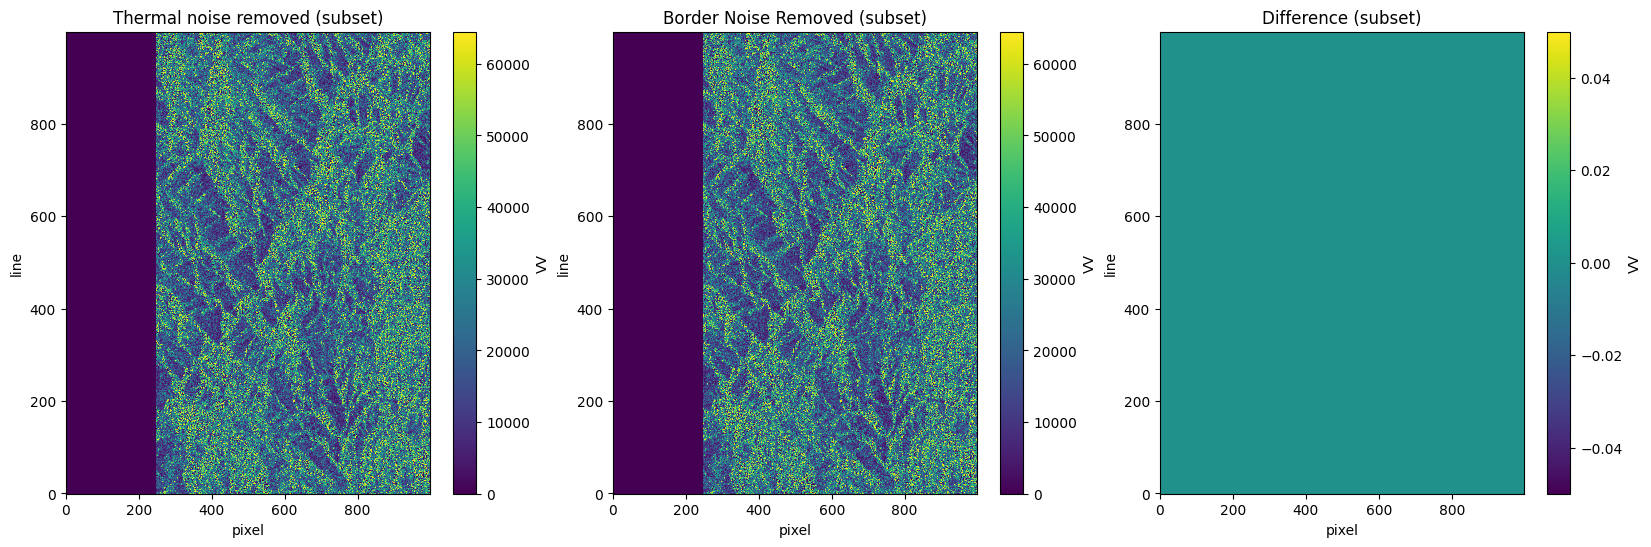

In [10]:
window = dict(line=slice(0, 1000), pixel=slice(0, 1000))  # or y/x depending on dims
band = 'VV'

thermal_ds = thermal_noise_corrected_ds.isel(**window)
border_ds = bordernoise_removed_ds.isel(**window)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(20,6))
thermal_ds[band].plot(ax=axs[0])
axs[0].set_title('Thermal noise removed (subset)')
border_ds[band].plot(ax=axs[1])
axs[1].set_title('Border Noise Removed (subset)')
(diff := (thermal_ds[band] - border_ds[band])).plot(ax=axs[2])
axs[2].set_title('Difference (subset)')
plt.show()


In [11]:
# Calling function for parsing radiometric calibration LUT
# sigma_nought_lut=parse_radiometric_calibration_lut(safe_folder, "sigmaNought")

# Calling function to apply radiometric calibration in dataset and this method must be applied after applying thermal noise removal
radiometric_calibrated_ds=processor.radiometric_calibration(safe_folder,bordernoise_removed_ds,"sigmaNought")

Reading calibration for VH band
Reading calibration for VV band
Radiometric calibration LUT created successfully
Radiometric calibration completed successfully


In [12]:
print(radiometric_calibrated_ds)

<xarray.Dataset> Size: 7GB
Dimensions:      (line: 16680, pixel: 26182)
Coordinates:
    spatial_ref  int32 4B 0
  * line         (line) int32 67kB 0 1 2 3 4 5 ... 16675 16676 16677 16678 16679
  * pixel        (pixel) int32 105kB 0 1 2 3 4 ... 26177 26178 26179 26180 26181
Data variables:
    VH           (line, pixel) float64 3GB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    VV           (line, pixel) float64 3GB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0


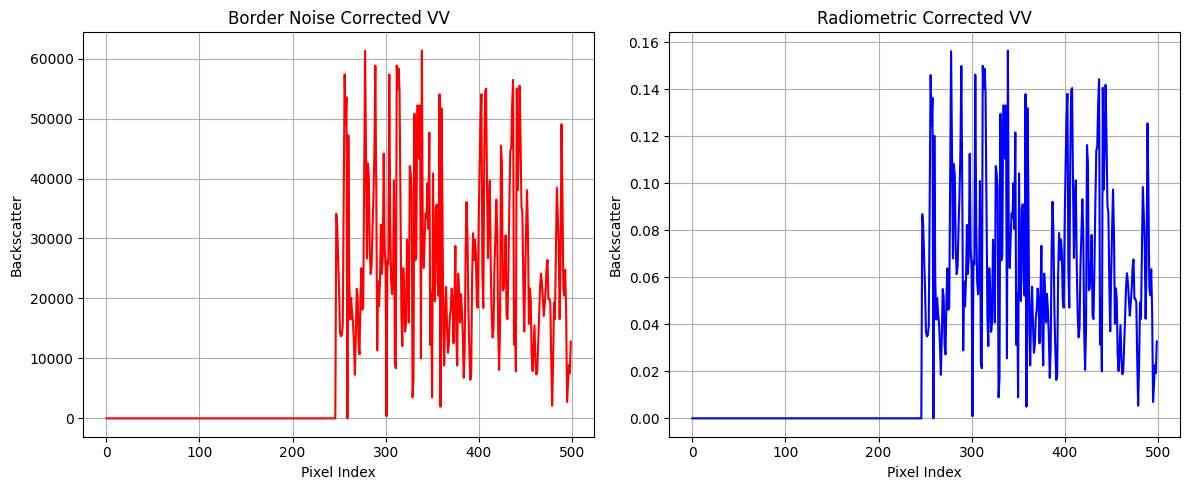

In [13]:
# similarly plotting result after radiometric calibration 
# Flatten data
original_vv = bordernoise_removed_ds['VV'].isel(line=5000).values.flatten()[:500]
corrected_vv = radiometric_calibrated_ds['VV'].isel(line=5000).values.flatten()[:500]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot original
axs[0].plot(original_vv, color='red')
axs[0].set_title("Border Noise Corrected VV")
axs[0].set_xlabel("Pixel Index")
axs[0].set_ylabel("Backscatter")
axs[0].grid(True)

# Plot corrected
axs[1].plot(corrected_vv, color='blue')
axs[1].set_title("Radiometric Corrected VV")
axs[1].set_xlabel("Pixel Index")
axs[1].set_ylabel("Backscatter")
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [14]:
from scipy.ndimage import uniform_filter

In [15]:
#defining a function to apply lee filtering on S1 image
def lee_filter(img, size):
    """
    Apply Lee filter with specified window size.
    Adapted from https://stackoverflow.com/questions/39785970/speckle-lee-filter-in-python

    Parameters
        img(np.ndarray) :mInput image (2D array).
        size (int): Window size (e.g., 5, 7).

    Returns
        np.ndarray: Speckle-filtered image.
    """
    img_mean = uniform_filter(img, size)
    img_sqr_mean = uniform_filter(img ** 2, size)
    img_variance = img_sqr_mean - img_mean ** 2

    # Estimate overall variance from image
    overall_variance = np.mean(img_variance)

    img_weights = img_variance / (img_variance + overall_variance)
    img_output = img_mean + img_weights * (img - img_mean)

    return img_output

In [ ]:
def speckle_filter(ds, method = 'lee', size=7):
    """
    Apply speckle filtering to all bands in xarray.Dataset.
    Currently supports only Lee filter as filtering method

    Parameters
        ds (xarray.Dataset): Input dataset with dimensions ('line','pixel') or ('y','x').
        method (str, optional): Filtering method ('lee' supported, default).
        size (int, optional): Window size (default: 7).

    Returns
        xarray.Dataset : Dataset with new variables '{band}_filtered'.
    """
    if method != 'lee':
        raise NotImplementedError(f"Speckle filter method '{method}' not implemented.")

    filtered_vars = {}
    for band in ds.data_vars:
        arr = ds[band]

        # Create valid data mask (avoid propagating NaNs)
        valid_mask = np.isfinite(arr)
        arr_filled = arr.fillna(0)

        # Apply Lee filter using xarray.apply_ufunc
        filtered = xr.apply_ufunc(
            lee_filter,
            arr_filled,
            kwargs={'size': size},
            input_core_dims=[['line', 'pixel']],   # adjust if dimensions are ('y','x')
            output_core_dims=[['line', 'pixel']],
            vectorize=True,
            dask='parallelized',
            output_dtypes=[arr.dtype]
        )

        # Restore original NaNs
        filtered = filtered.where(valid_mask)

        filtered_vars[f"{band}_filtered"] = filtered

    return ds.assign(**filtered_vars)

In [21]:
filtered_ds = speckle_filter(radiometric_calibrated_ds, size=7)

In [22]:
print(filtered_ds)

<xarray.Dataset> Size: 14GB
Dimensions:      (line: 16680, pixel: 26182)
Coordinates:
    spatial_ref  int32 4B 0
  * line         (line) int32 67kB 0 1 2 3 4 5 ... 16675 16676 16677 16678 16679
  * pixel        (pixel) int32 105kB 0 1 2 3 4 ... 26177 26178 26179 26180 26181
Data variables:
    VH           (line, pixel) float64 3GB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    VV           (line, pixel) float64 3GB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    VH_filtered  (line, pixel) float64 3GB 0.0 0.0 0.0 ... 5.452e-17 5.452e-17
    VV_filtered  (line, pixel) float64 3GB 0.0 0.0 0.0 ... -4.114e-16 -4.114e-16


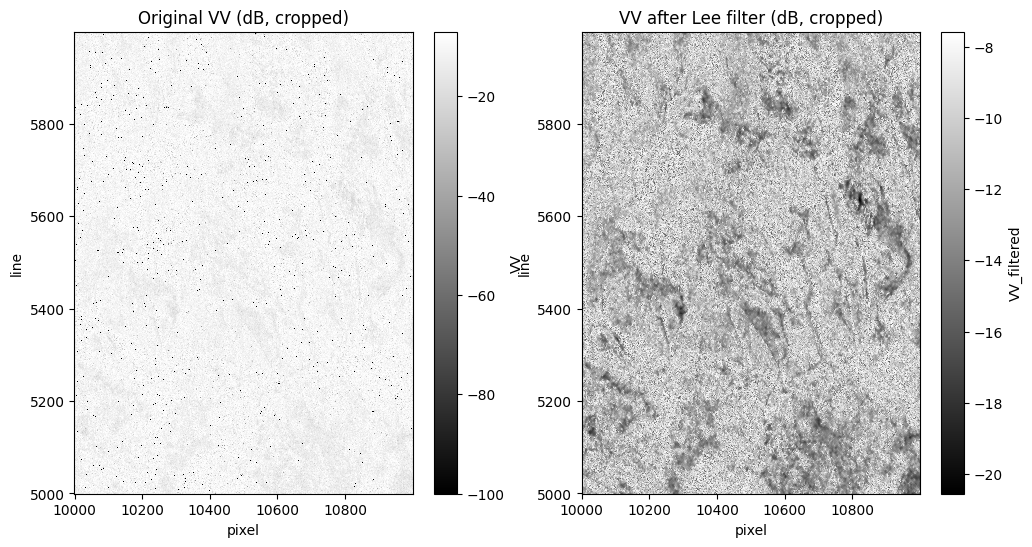

In [23]:
import numpy as np
import matplotlib.pyplot as plt

band = 'VV'  # or 'VH'

# Convert to dB safely (avoid log(0))
original_db = 10 * np.log10(np.maximum(radiometric_calibrated_ds[band], 1e-10))
filtered_db = 10 * np.log10(np.maximum(filtered_ds[f"{band}_filtered"], 1e-10))

crop = dict(line=slice(5000, 6000), pixel=slice(10000, 11000))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
original_db.isel(**crop).plot(ax=axs[0], cmap='gray')
axs[0].set_title(f'Original {band} (dB, cropped)')
filtered_db.isel(**crop).plot(ax=axs[1], cmap='gray')
axs[1].set_title(f'{band} after Lee filter (dB, cropped)')
plt.show()



In [24]:
# convert from linear to dB function

def convert_to_db(ds, bands=['VV', 'VH'], floor=1e-10):
    """
    Convert specified bands in an xarray.Dataset to decibel (dB) scale.
    Adds new variables with '_db' suffix to the dataset.

    Parameters
        ds (xarray.Dataset): Input dataset containing power or intensity bands.
        bands (list of str, optional): Names of bands to convert. Defaults to ['VV', 'VH'].
        floor (float, optional): Minimum value to avoid log(0). Default is 1e-10.

    Returns
        xarray.Dataset :Dataset with additional bands in dB (e.g., 'VV_db', 'VH_db').
    """
    new_vars = {}
    for band in bands:
        if band in ds:
            db = 10 * np.log10(np.maximum(ds[band], floor))
            new_vars[f"{band}_db"] = db
        else:
            print(f"Warning: band '{band}' not found in dataset; skipping.")
    return ds.assign(**new_vars)


In [26]:
# Convert and get a dataset with new 'VV_db' and 'VH_db' variables
filtered_ds_db = convert_to_db(filtered_ds)

# View
print(filtered_ds_db)

<xarray.Dataset> Size: 21GB
Dimensions:      (line: 16680, pixel: 26182)
Coordinates:
    spatial_ref  int32 4B 0
  * line         (line) int32 67kB 0 1 2 3 4 5 ... 16675 16676 16677 16678 16679
  * pixel        (pixel) int32 105kB 0 1 2 3 4 ... 26177 26178 26179 26180 26181
Data variables:
    VH           (line, pixel) float64 3GB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    VV           (line, pixel) float64 3GB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    VH_filtered  (line, pixel) float64 3GB 0.0 0.0 0.0 ... 5.452e-17 5.452e-17
    VV_filtered  (line, pixel) float64 3GB 0.0 0.0 0.0 ... -4.114e-16 -4.114e-16
    VV_db        (line, pixel) float64 3GB -100.0 -100.0 ... -100.0 -100.0
    VH_db        (line, pixel) float64 3GB -100.0 -100.0 ... -100.0 -100.0
